[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MaxMitre/Aplicaciones-Financieras/blob/main/Semana5/Ruido_series_de_tiempo.ipynb)

In [ ]:
import numpy as np
import pandas as pd

from statsmodels.tsa.arima_process import ArmaProcess          # para simular proceso ARMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  

import matplotlib.pyplot as plt

In [ ]:
def genera_puntos_regresion(m, b, sigma, size=10):
    '''genera coordenadas en x y y de puntos aleatorios
    en regresión.
    m: pendiente
    b: ordenada al origen
    sigma: desviación estándar de errores gaussianos
    size: cantidad de puntos a generar'''
    
    errors = 0
    xdata = np.linspace(-1.0,1.0,size)
    errors = np.random.normal(0, sigma, size) 
    ydata = m * xdata + b + errors

    return xdata, ydata

# Simulación de puntos en 2d a partir de la ecuación de una recta

## Sin Ruido 

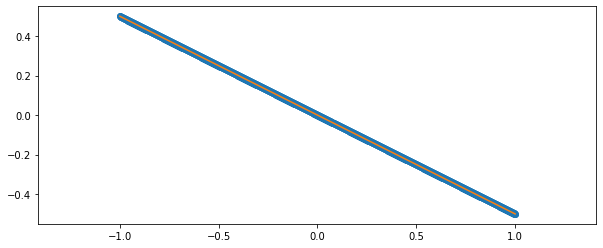

In [ ]:
m = -0.5
b = 0
sigma = 0

xs, ys = genera_puntos_regresion(m, b, sigma, size=1000)

fig = plt.figure(figsize = (10, 4))
plt.plot(xs, ys, 'o')
plt.plot(xs, m * xs + b)

plt.axis('equal')
plt.show()

## Con Ruido

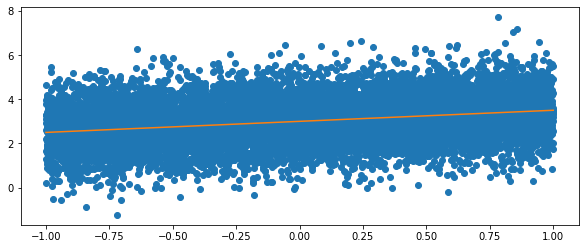

In [ ]:
m = 0.5
b = 3
sigma = 1

fig = plt.figure(figsize = (10, 4))
xs, ys = genera_puntos_regresion(m, b, sigma, size=10000)

plt.plot(xs, ys, 'o')
plt.plot(xs, m * xs + b)
plt.show()

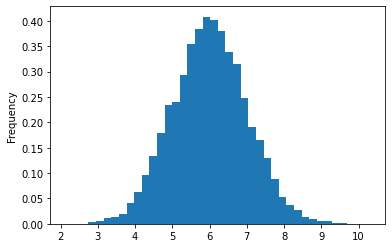

In [ ]:
errores = ys -  m * xs + b 
pd.Series(errores).plot.hist(bins=40, density = True)

# Simulación de Ruido blanco

### iid

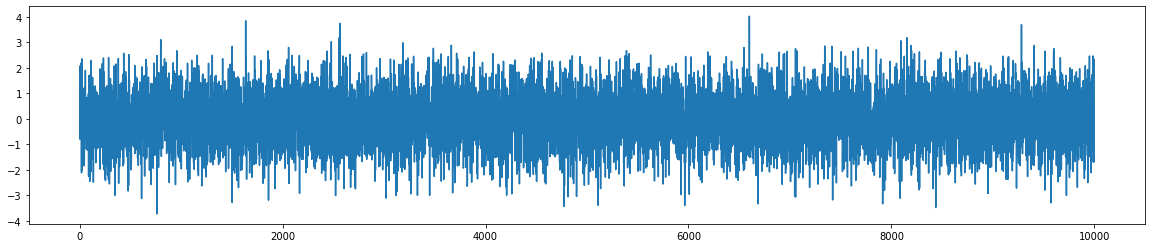

In [ ]:
media = 0
std = 1
num_muestras = 10000
ruido_blanco = pd.Series(np.random.normal(media, std, num_muestras))

ruido_blanco.plot(figsize = (20,4))
plt.show()

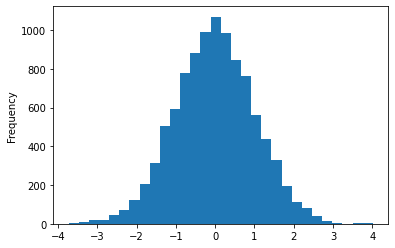

In [ ]:
ruido_blanco.plot.hist(bins=30)

### otros ruidos blancos

####Ejemplo 1 

1) Sea $X_t$ un proceso iid y $Y$ una variable aleatoria con distribución Bernoulli con $p = 0.05$

Entonces la variable aleatoria 

$Z_t= X_t~Y- X_t(Y-1)^2$ es un ruido blanco

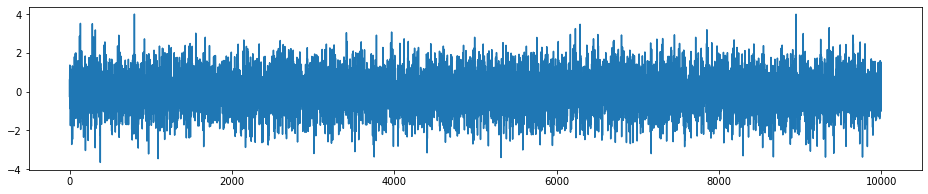

In [ ]:
num_muestras = 10000
X_t = pd.Series(np.random.normal(size= num_muestras))
Y = pd.Series(np.random.binomial(1, p = 0.05, size = num_muestras))
Z_t = (X_t * Y) - X_t*pow((Y - 1),2)

Z_t.plot(figsize = (16,3))
plt.show()

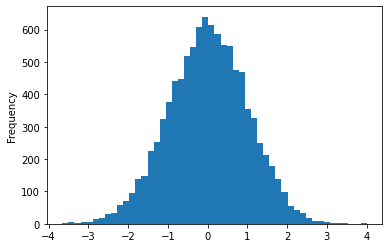

In [ ]:
Z_t.plot.hist(bins=50)

####Ejemplo 2

2) Sea $X_t$ un proceso iid y el proceso estocástico definido por:

- $Z_t = X_t$ cuando t es par, y 
- $Z_t = \frac{1}{\sqrt{2}}(X^2_{t-1}-1)$ cuando t es impar,

es un ruido blanco

In [ ]:
Xt = pd.Series(np.random.normal(size= 10000)) #proceso iid
Xt

0      -0.333054
1      -0.253220
2       0.782901
3      -1.203709
4       1.613590
          ...   
9995   -0.248389
9996    1.257827
9997   -0.422510
9998    0.188542
9999   -1.124232
Length: 10000, dtype: float64

In [ ]:
Zt = pd.Series(np.zeros(10000))
Zt

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
9995    0.0
9996    0.0
9997    0.0
9998    0.0
9999    0.0
Length: 10000, dtype: float64

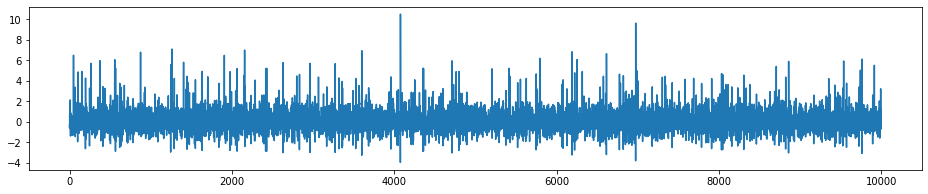

In [ ]:
Zt = pd.Series(np.zeros(10000))
for i in range(len(Zt)):
  if i % 2 == 0:
    Zt[i]= Xt[i]
  else:
    Zt[i] = 1/np.sqrt(2)*(pow(Xt[i-1], 2)-1)

Zt.plot(figsize = (16,3))
plt.show()

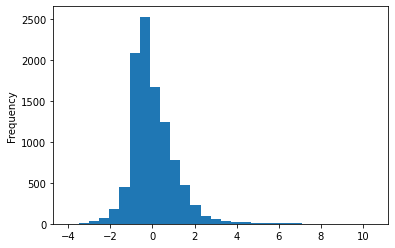

In [ ]:
Zt.plot.hist(bins=30)

# Simulación de un proceso autorregresivo  (AR)

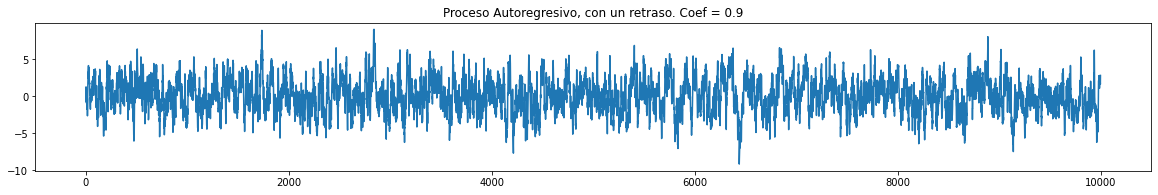

In [ ]:
coef = 0.9 
plt.subplot(2,1,1)
ar = np.array([1, - coef]) 
ma = np.array([1])

titulo = 'Proceso Autoregresivo, con un retraso. Coef = ' + str(coef)
AR_model = ArmaProcess(ar, ma)
plt.rc("figure", figsize=(20,4))


AR_simulacion = pd.Series(AR_model.generate_sample(nsample=10000))
AR_simulacion.plot(figsize = (20,6), title=titulo)
plt.show()

## Funciones de autocorrelación y autocorrelación parcial

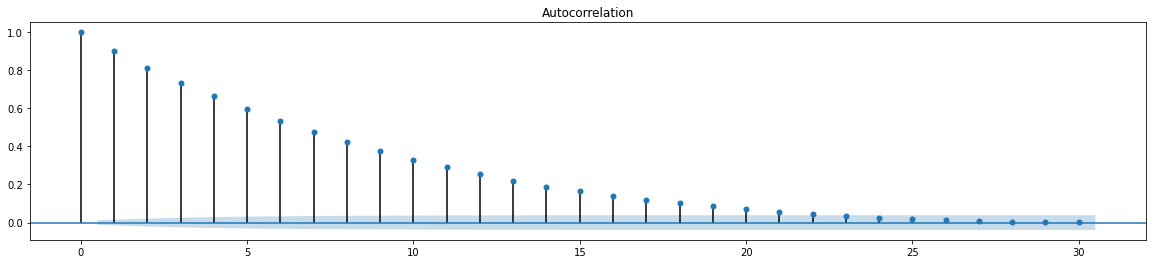

In [ ]:
# Función de autocorrelación
plot_acf(AR_simulacion,   alpha=0.2, lags=30)
plt.show()

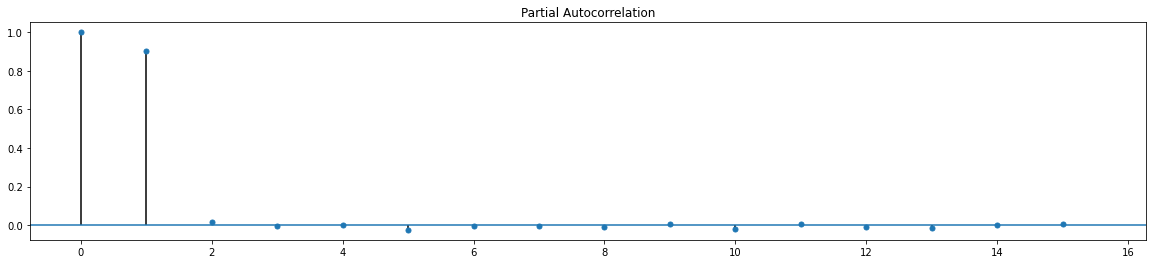

In [ ]:
# Función de autocorrelación parcial

plot_pacf(AR_simulacion, alpha=1, lags=15)
plt.show()

# Simulación de serie de tiempo Medias Móviles (MA)

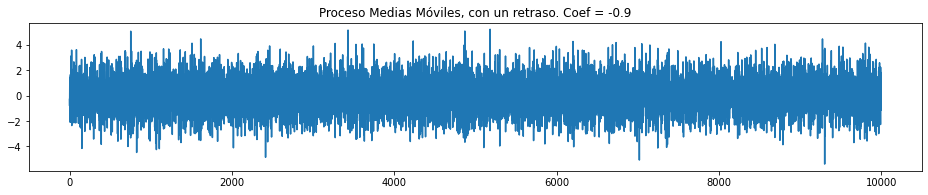

In [ ]:
coef = -0.9
plt.subplot(2,1,1)
ar = np.array([1]) 
ma = np.array([1, coef])

titulo = 'Proceso Medias Móviles, con un retraso. Coef = ' + str(coef)
MA_model = ArmaProcess(ar, ma)
MA_simulacion = pd.Series(MA_model.generate_sample(nsample=10000))
MA_simulacion.plot(figsize = (16,6), title=titulo)
plt.show()

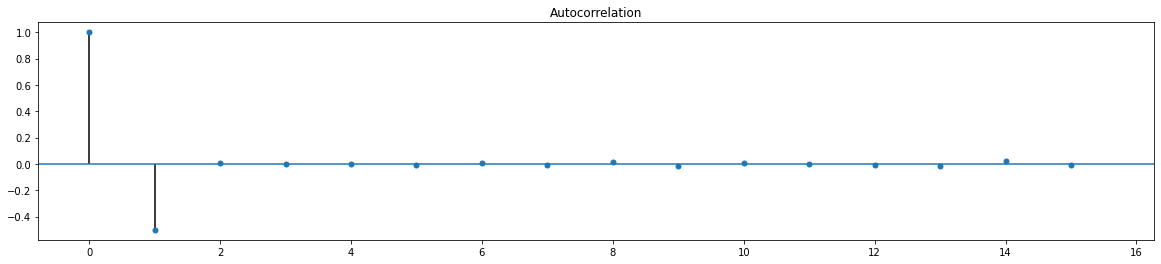

In [ ]:
# Función de autocorrelación
plot_acf(MA_simulacion, alpha=1, lags=15)
plt.show()